### Задание 0
Используя метод моментов с пробными функциями $g(x) = x^k, k \in \mathbb{N},$ оценить параметр $\theta$

(a) равномерного распределения $U[0, \theta] = \theta \cdot U[0,1]$;

(b) экспоненциального распределения $Exp(\theta) = \theta \cdot Exp(1)$.

 (a)  $E\xi^k = \int\limits_{0}^{\theta}x^k\frac{1}{\theta}dx = \frac{\theta^{k + 1}}{(k + 1)\theta} = \frac{\theta^{k}}{k + 1}$
	
Получаем оценку для $\theta$:
\begin{gather*}
\theta^{*} = ((k + 1)\overline{x^k})^{\frac{1}{k}}
\end{gather*}
	
(b) $E\xi^k = \int\limits_{0}^{+\infty}x^k\frac{1}{\theta}e^{\frac{-x}{\theta}}dx  = \theta^{k}\text{Г}(k + 1) = \theta^{k}k!$
		
Получаем оценку для $\theta$:
\begin{gather*}
\theta^{*} = (\frac{\overline{x^k}}{k!})^{\frac{1}{k}}
\end{gather*}


### Задание 1
Численно исследуйте поведение среднеквадратичного отклонения (СКО) построенных оценок: генерируйте выборку из нужного распределения, оцениваете параметр, считаете отклонение оценки от параметра, повторяете это много раз, получаете оценку СКО, строите график зависимости СКО от $k$. 

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [50]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()

    ax.plot(x_data, y_data, lw = 2, color = '#297083', alpha = 1)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [51]:
def generation_uni(theta, N_sample, N_ex, k_max):
    lst_k = [0]*k_max
    for i in range(N_ex):
        y = np.random.uniform(0, theta, N_sample)
        
        for k in range(1, k_max + 1):      
            theta_est = ((k + 1)/N_sample * sum([i**k for i in y]))**(1/k)
            lst_k[k - 1] += (theta_est - theta)*(theta_est - theta)

    
    return [el / N_ex for el in lst_k]

def generation_exp(theta, N_sample, N_ex, k_max):
    lst_k = [0]*k_max
    for i in range(N_ex):
        y = np.random.exponential(1/theta, N_sample)
        
        for k in range(1, k_max + 1):      
            theta_est = (1/math.factorial(k) * sum([i**k for i in y])/N_sample)**(1/k)
            lst_k[k - 1] += (theta_est - theta)*(theta_est - theta)

    
    return [el / N_ex for el in lst_k]



In [52]:
N_sample = 100
N_ex = 100
k_max = 100
theta_1 = 1
k_1 = [i for i in range(1, k_max + 1)]
y_1 = generation_uni(theta_1, N_sample, N_ex, k_max)
y_2 = generation_exp(theta_1, N_sample, N_ex, k_max)

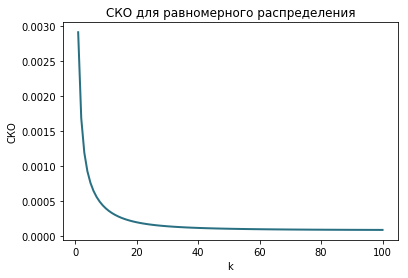

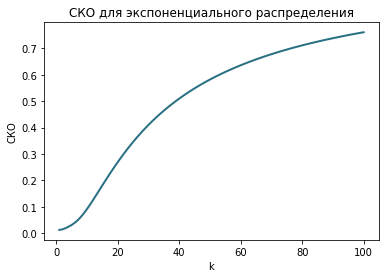

In [53]:
lineplot(k_1, y_1, x_label="k", y_label="СКО", title="СКО для равномерного распределения")
lineplot(k_1, y_2, x_label="k", y_label="СКО", title="СКО для экспоненциального распределения")

Посмотрим, что происходит при другом $\theta$.

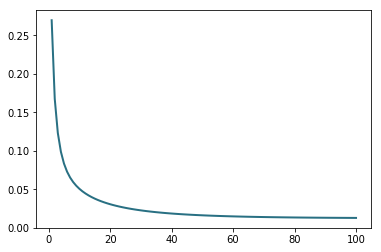

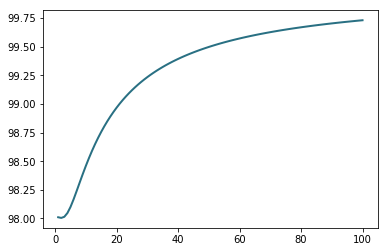

In [54]:
theta_1 = 10
k_1 = [i for i in range(1, k_max + 1)]
y_1 = generation_uni(theta_1, N_sample, N_ex, k_max)
y_2 = generation_exp(theta_1, N_sample, N_ex, k_max)
lineplot(k_1, y_1)
lineplot(k_1, y_2)

Для равномерного распределения среднеквадратичное отклонение уменьшается с ростом $k$, то есть с ростом $k$ оценка параметра становится все лучше, что не скажешь про СКО для экспоненциального распределения. Для нее же с увеличением $k$ оценка становится все хуже.

Для экспоненциального распределения надо брать $k$ поменьше.